# **Imports**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importação e configuração para o padrão Seaborn
import seaborn as sns
sns.set()

# **Carregar os dados**

> Estado de Goiás



In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_GO = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-GO.csv',sep=';',low_memory=False) # Salvamos com esse nome antes

In [ ]:
# Mostrar as 5 primeiras linhas do csv
df_GO.head()

# **Tratamento dos dados**

> Estado de Goiás



IBGE - População estimada de Goiás

7.206.589
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/go.html

In [6]:
# mostra os nomes das colunas
df_GO.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [7]:
# Selecionar 3 colunas para a primeira análise
df_GO1 = df_GO.iloc[: , [0,28,30]]
df_GO1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1ab7f230-bff6-4e3b-972e-fc8e075c61c3-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
1,11812484-aafd-4025-941b-89980899edfd-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
2,1abef6b1-d0ca-469d-abdc-cb3a4b33fe6e-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
3,1186cfb4-f569-4960-881a-ff0045e4a7dc-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,1ac2e3b7-a6a7-4695-9ae2-e0e32ddb68d9-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY


In [9]:
data = df_GO1.groupby(['vacina_descricao_dose','vacina_nome']).count()
data

document_id
vacina_descricao_dose vacina_nome                                           
1ª Dose               COVID-19 ASTRAZENECA - ChAdOx1-S                 44936
                      COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD       608939
                      COVID-19 PEDIÁTRICA - PFIZER COMIRNATY           72500
                      COVID-19 PFIZER - COMIRNATY                     683643
                      COVID-19 SINOVAC - CORONAVAC                      7897
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC           508670
1ª Dose Revacinação   COVID-19 SINOVAC/BUTANTAN - CORONAVAC                1
2ª Dose               COVID-19 ASTRAZENECA - ChAdOx1-S                 59396
                      COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD       546235
                      COVID-19 PEDIÁTRICA - PFIZER COMIRNATY           42770
                      COVID-19 PFIZER - COMIRNATY                     577174
                      COVID-19 SINOVAC - CORONAVAC                      7779
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC           436139
2º Reforço            COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD        11935
                      COVID-19 JANSSEN - Ad26.COV2.S                   55579
                      COVID-19 PFIZER - COMIRNATY                      76291
                      COVID-19 SINOVAC - CORONAVAC                       124
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC              256
3ª Dose               COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD            1
3º Reforço            COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD           37
                      COVID-19 JANSSEN - Ad26.COV2.S                     164
                      COVID-19 PFIZER - COMIRNATY                         46
                      COVID-19 SINOVAC - CORONAVAC                         4
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC                5
Dose                  COVID-19 JANSSEN - Ad26.COV2.S                   54262
                      COVID-19 PEDIÁTRICA - PFIZER COMIRNATY               1
Dose Adicional        COVID-19 ASTRAZENECA - ChAdOx1-S                     1
                      COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD         3875
                      COVID-19 JANSSEN - Ad26.COV2.S                   12699
                      COVID-19 PFIZER - COMIRNATY                      41696
                      COVID-19 SINOVAC - CORONAVAC                       158
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC              474
Dose Inicial          COVID-19 PEDIÁTRICA - PFIZER COMIRNATY               1
Reforço               COVID-19 ASTRAZENECA - ChAdOx1-S                     7
                      COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD        36802
                      COVID-19 JANSSEN - Ad26.COV2.S                  100456
                      COVID-19 PFIZER - COMIRNATY                     647054
                      COVID-19 SINOVAC - CORONAVAC                      2868
                      COVID-19 SINOVAC/BUTANTAN - CORONAVAC             6322

In [21]:
df_GO1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                1926585
1ª Dose Revacinação          1
2ª Dose                1669493
2º Reforço              144185
3ª Dose                      1
3º Reforço                 256
Dose                     54263
Dose Adicional           58903
Dose Inicial                 1
Reforço                 793509
Name: document_id, dtype: int64

***> Gráficos com 1ª, 2ª e dose única do df_GO1.goupby***

In [46]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['1926585', '1669493','54263']
}
  
# criando outro DataFrame
df1 = pd.DataFrame(dataN)

In [47]:
df1['Id_qtd_dose'] = df1['Id_qtd_dose'].astype(int)

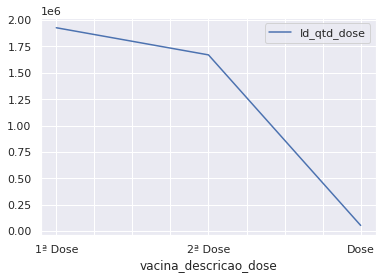

In [48]:
df1.plot(x='vacina_descricao_dose', y = 'Id_qtd_dose', kind = 'line')
plt.show()

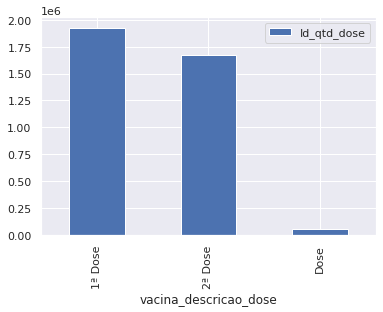

In [49]:
df1.plot(x='vacina_descricao_dose', y = 'Id_qtd_dose', kind = 'bar')
plt.show()



> ***Gráficos com todos os dados do df_GO1.groupby***



In [50]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
dataN = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','2ª Dose','2ª Reforço','3ª Dose','3ª Reforço','Dose','Dose Adicional','Dose Inicial','Reforço'],
    'Id_qtd_dose': ['1926585', '1', '1669493', '144185','1','256','54263','58903','1','793509']
}
  
# criando outro DataFrame
df1 = pd.DataFrame(dataN)

In [51]:
df1['Id_qtd_dose'] = df1['Id_qtd_dose'].astype(int)

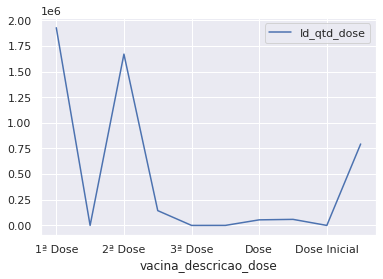

In [52]:
df1.plot(x='vacina_descricao_dose', y = 'Id_qtd_dose', kind = 'line')
plt.show()

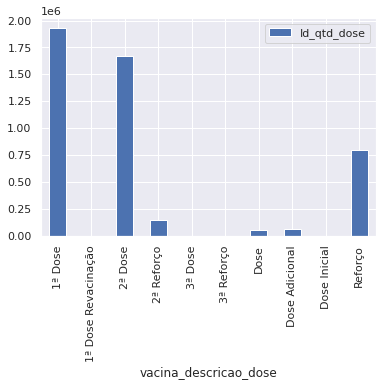

In [53]:
df1.plot(x='vacina_descricao_dose', y = 'Id_qtd_dose', kind = 'bar')
plt.show()